<a href="https://colab.research.google.com/github/IsmayilGasim/AI-Lesson-notes/blob/main/Unsupervised_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# K-Means

In [2]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

blob_centers = np.array([[0.2,2.3], [-1.5,2.3], [-2.8,1.8], [-2.8,2.8], [-2.8, 1.3]])

blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])
X,y = kme(n_samples=2000, centers=blob_centers, cluster_std=blob_std, random_state=7)

k=5
kmeans = KMeans(n_clusters=k,n_init=10, random_state=42) # 10 defe cehd veririk. en yaxsi neticeni qaytarir
y_pred = kmeans.fit_predict(X)

#

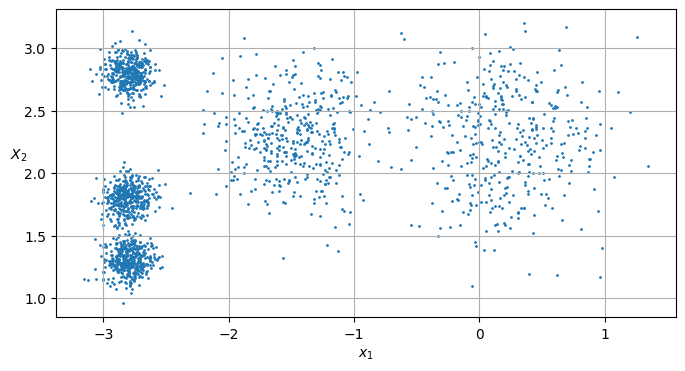

In [4]:
def plot_clusters(X,y=None):
  plt.scatter(X[:,0], X[:,1], c=y,s=1)
  plt.xlabel("$x_1$")
  plt.ylabel("$X_2$", rotation=0)

plt.figure(figsize=(8,4))
plot_clusters(X)
plt.grid()
plt.show()

In [5]:
y_pred

array([0, 0, 4, ..., 3, 1, 0], dtype=int32)

In [6]:
kmeans.labels_

array([0, 0, 4, ..., 3, 1, 0], dtype=int32)

In [8]:
y_pred is kmeans.labels_ # value ve type olaraq beraberdir. ve yaddasda eyni referansdir

True

In [9]:
kmeans.cluster_centers_ #kordinatlardir

array([[-2.80214068,  1.55162671],
       [ 0.08703534,  2.58438091],
       [-1.46869323,  2.28214236],
       [-2.79290307,  2.79641063],
       [ 0.31332823,  1.96822352]])

In [10]:
import numpy as np
X_new = np.array([[0,2],[3,2],[-3,3],[-3,2.5]])
kmeans.predict(X_new)

array([4, 4, 3, 3], dtype=int32)

In [11]:
X_new.shape, X.shape

((4, 2), (2000, 2))

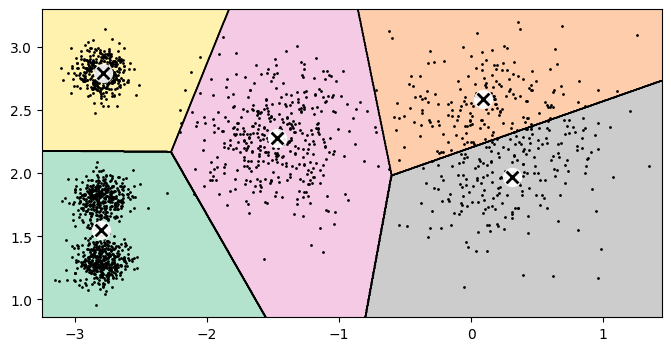

In [12]:
def plot_data(X):
   plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)


def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
   if weights is not None:
       centroids = centroids[weights > weights.max() / 10]
   plt.scatter(centroids[:, 0], centroids[:, 1],
               marker='o', s=35, linewidths=8,
               color=circle_color, zorder=10, alpha=0.9)
   plt.scatter(centroids[:, 0], centroids[:, 1],
               marker='x', s=2, linewidths=12,
               color=cross_color, zorder=11, alpha=1)


def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                            show_xlabels=True, show_ylabels=True):
   mins = X.min(axis=0) - 0.1
   maxs = X.max(axis=0) + 0.1
   xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                        np.linspace(mins[1], maxs[1], resolution))
   Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
   Z = Z.reshape(xx.shape)


   plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
               cmap="Pastel2")
   plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
               linewidths=1, colors='k')
   plot_data(X)
   if show_centroids:
       plot_centroids(clusterer.cluster_centers_)


   if show_xlabels:
       plt.xlabel("")
   else:
       plt.tick_params(labelbottom=False)
   if show_ylabels:
       plt.ylabel("", rotation=0)
   else:
       plt.tick_params(labelleft=False)


plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans, X)
plt.show()


In [13]:
kmeans.transform(X_new).round(2)

array([[2.84, 0.59, 1.5 , 2.9 , 0.31],
       [5.82, 2.97, 4.48, 5.85, 2.69],
       [1.46, 3.11, 1.69, 0.29, 3.47],
       [0.97, 3.09, 1.55, 0.36, 3.36]])

In [14]:
good_init = np.array([[-3, 3], [-3, 2], [-3, 1], [-1, 2], [0,2]])
kmeans = KMeans(n_clusters=5, init=good_init, n_init=1, random_state=42)
kmeans.fit(X)

KMeans(init=array([[-3,  3],
       [-3,  2],
       [-3,  1],
       [-1,  2],
       [ 0,  2]]),
       n_clusters=5, n_init=1, random_state=42)

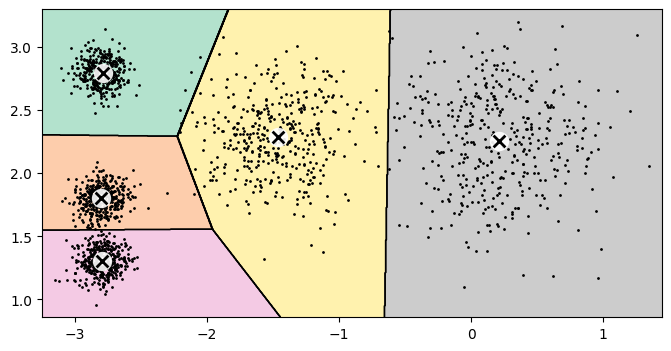

In [15]:
plt.figure(figsize=(8,4))
plot_decision_boundaries(kmeans, X)

In [16]:
kmeans.inertia_

211.59853725816828

In [17]:
kmeans.score(X)

-211.59853725816828

In [20]:
kmeans_rnd_10_inits = KMeans(n_clusters=5, init='random', n_init=10,
                             random_state=2)

kmeans_rnd_10_inits.fit(X)

KMeans(init='random', n_clusters=5, n_init=10, random_state=2)

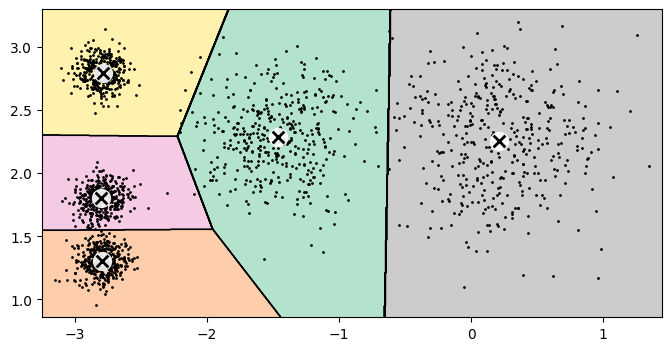

In [21]:
plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans_rnd_10_inits, X)
plt.show()

In [22]:
kmeans_rnd_10_inits.inertia_

211.59853725816828

formalar oval kimi olanda k-means daha yaxsi netice vermir

# Mini-Batch K-Means